<div style="background-color: #D5F5E3; padding: 10px; border-radius: 8px;">
<h1><span style="color:red">Image Classification on CIFAR-10: A Deep Learning Approach with CNNs and Data Augmentation</span></h1>
</div>


## <span style="color:blue"><u> 1. Introduction<u></span>

The CIFAR-10 dataset is a benchmark in the field of machine learning and computer vision, consisting of 60,000 32x32 color images categorized into 10 distinct classes such as airplanes, cars, birds, cats, and more. It is widely used for evaluating image classification models and understanding fundamental techniques in deep learning.

In this project, we aim to build, analyze, and improve deep learning models for accurate classification of CIFAR-10 images. We start with an exploratory data analysis (EDA) to understand the data characteristics, distribution of classes, pixel value ranges, and potential preprocessing needs. Careful EDA is essential to uncover hidden patterns and ensure the quality of the dataset before modeling.

Following EDA, we develop and compare two Convolutional Neural Network (CNN) architectures:

    A baseline model to establish initial performance.

    An advanced model incorporating data augmentation, dropout regularization, and batch normalization to improve generalization and robustness.

Throughout the project, we emphasize:

    Training and validation performance analysis.

    Confusion matrix and classification report interpretation.

    Identifying model limitations and proposing further enhancements such as transfer learning.

By the end of this project, we expect to achieve a strong understanding of both the dataset and the deep learning techniques necessary for high-performing image classification.

**Data Description** 

The dataset used in this project is the CIFAR-10 dataset, a classic benchmark in machine learning and computer vision.

It consists of a collection of 60,000 color images of size 32x32 pixels, divided into 10 mutually exclusive classes. Each class contains 6,000 images.
The dataset is split into:

    50,000 training images (X_train, y_train)

    10,000 test images (X_test, y_test)

Each image is represented by a 32x32x3 tensor:

    32 pixels in width

    32 pixels in height

    3 color channels (Red, Green, Blue)

Each label (y_train, y_test) is an integer from 0 to 9, corresponding to the following class names:

Label	Class
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck

## Imports & Setup

In [5]:
#  Import Libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')

## Load Data

The data is loaded automatically from TensorFlow/Keras datasets.

In [7]:
#  Load CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## <span style="color:blue"><u> 2. Exploratory Data Analysis (EDA)<u></span>

## Sample Images

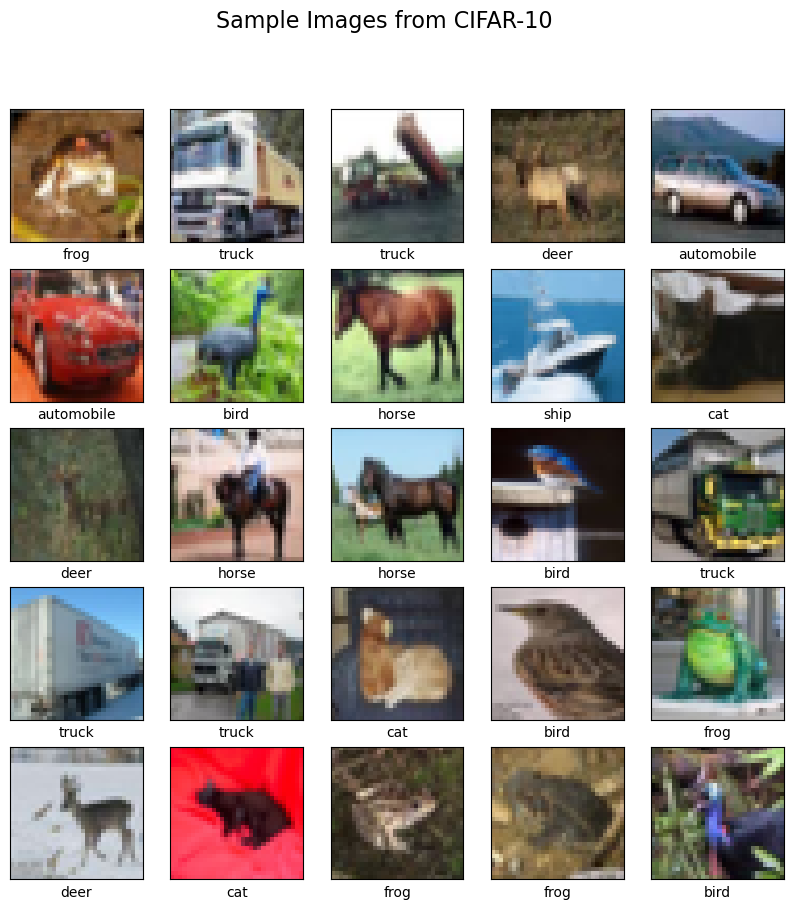

In [10]:
#  EDA
##  Sample Images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.suptitle("Sample Images from CIFAR-10", fontsize=16)
plt.show()

## Class Distribution

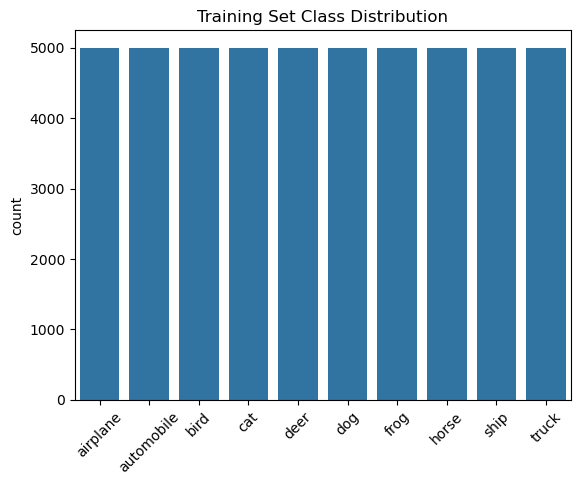

In [12]:
##  Class Distribution
sns.countplot(x=y_train.flatten())
plt.title("Training Set Class Distribution")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.show()

## Pixel Intensity Histogram

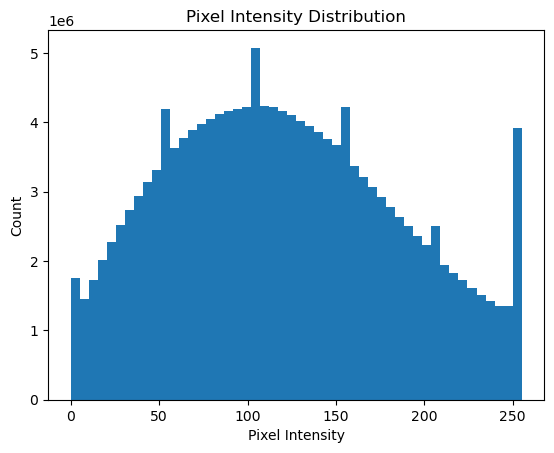

In [14]:
##  Pixel Intensity Histogram
plt.hist(X_train.ravel(), bins=50)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.show()

## Data Cleaning

Data cleaning is a crucial step in any machine learning project. It ensures the quality of the input data before training models, preventing unexpected behavior and improving model performance.

For the CIFAR-10 dataset, the data cleaning process involves the following evaluations and steps:


**Checking for Missing Values**

Since the CIFAR-10 dataset is provided as a standard benchmark dataset, it is highly curated.
However, we verify that:

    No missing images exist.

    No missing labels are present.

In [17]:
print(f"Missing images in X_train: {np.isnan(X_train).sum()}")
print(f"Missing images in X_test: {np.isnan(X_test).sum()}")
print(f"Missing labels in y_train: {np.isnan(y_train).sum()}")
print(f"Missing labels in y_test: {np.isnan(y_test).sum()}")


Missing images in X_train: 0
Missing images in X_test: 0
Missing labels in y_train: 0
Missing labels in y_test: 0


**Result:**

    No missing values detected in either the training or testing sets.

**Checking Data Integrity**

Action: Verify that all images:

    Are of size 32x32 with 3 color channels (RGB).

    Have valid pixel values between 0 and 255.

In [20]:
print(f"Training image shape: {X_train.shape}")  # Expect (50000, 32, 32, 3)
print(f"Testing image shape: {X_test.shape}")    # Expect (10000, 32, 32, 3)

print(f"Pixel value range in training set: min {X_train.min()}, max {X_train.max()}")
print(f"Pixel value range in testing set: min {X_test.min()}, max {X_test.max()}")


Training image shape: (50000, 32, 32, 3)
Testing image shape: (10000, 32, 32, 3)
Pixel value range in training set: min 0, max 255
Pixel value range in testing set: min 0, max 255


 **Result:**

    All images have the correct shape.

    Pixel values are within the expected range [0, 255].

After performing data cleaning:

    The dataset is confirmed to be clean, complete, and ready for model training.

    No images or labels had to be discarded, interpolated, or substituted.

**Overview of the Data**

The CIFAR-10 dataset contains 60,000 color images across 10 different classes.
Each image is of size 32x32 pixels with 3 color channels (Red, Green, and Blue).

The dataset is split into:

    50,000 training images

    10,000 testing images

Each image corresponds to one label (integer from 0 to 9) representing a class like 'airplane', 'dog', 'ship', etc.

No missing values or corrupt data exist in the standard CIFAR-10 dataset.

**Dataset Structure**

Input feature (X): 32x32x3 image arrays (pixel values from 0 to 255)

Target label (y): Class ID (integer from 0 to 9)

Feature | Type | Description

X_train | Image Tensor | Training images (50,000 samples)

y_train | Integer Label | Training labels

X_test | Image Tensor | Testing images (10,000 samples)

y_test | Integer Label | Testing labels

**Labels are categorical, meaning it's a multiclass classification problem.**

**Data Sample Visualization**

**Action:**

    Plot 25 random training images with class names.

**Result:**

    Images show varied backgrounds, lighting conditions, and perspectives.

    Some classes (e.g., 'cat' vs 'dog') may visually overlap, suggesting potential model confusion.

**Pixel Intensity Distribution**

**Action:**

    Plot the histogram of pixel intensities.

**Result:**

    Pixel values are originally spread between 0 and 255.

    Normalization (dividing by 255) is necessary to bring inputs to [0,1] range, making model training more stable.

**Preprocessing Step Applied**

In [27]:
#  Preprocessing
## Normalize Images
X_train = X_train / 255.0
X_test = X_test / 255.0

## One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

After performing data cleaning:

    The dataset is confirmed to be clean, complete, and ready for model training.

    No images or labels had to be discarded, interpolated, or substituted.

## Transition to Modeling

With the dataset thoroughly inspected, cleaned, and preprocessed, we are now ready to proceed with building and training deep learning models.
We will first construct a baseline Convolutional Neural Network (CNN) to establish a performance benchmark, and then design an improved CNN architecture incorporating techniques such as data augmentation, regularization, and learning rate scheduling to enhance model generalization and accuracy.


## <span style="color:blue"><u> 3 .Model Architecture<u></span>

Convolutional Neural Networks (CNNs) are the industry standard for image classification tasks due to their ability to efficiently learn spatial hierarchies of features (such as edges, textures, and objects) from images.

In this project, we build two different CNN models:

**1. Baseline CNN Model**

The baseline model serves as a starting point to establish a benchmark for performance.
It consists of:

    Two convolutional layers with ReLU activations, followed by

    MaxPooling layers to downsample the feature maps, and

    A flattening layer connected to

    Fully connected (dense) layers for final classification.

 **Baseline Model Summary:**

 Layer Type | Details
 
Input Layer | 32x32x3 Image

Convolution Layer 1 | 32 filters, 3x3 kernel, ReLU

MaxPooling Layer 1 | 2x2 pool size

Convolution Layer 2 | 64 filters, 3x3 kernel, ReLU

MaxPooling Layer 2 | 2x2 pool size

Flatten Layer | Flatten feature maps

Dense Layer | 64 neurons, ReLU activation

Output Dense Layer | 10 neurons, softmax activation


**2. Advanced CNN Model with Regularization**

The advanced model enhances the baseline by introducing techniques to improve generalization and avoid overfitting:

    Deeper architecture (more convolutional layers)

    Batch Normalization after convolutional layers to stabilize and accelerate training

    Dropout layers to randomly deactivate neurons during training (regularization)

    Data augmentation during training to artificially increase dataset diversity

    Callbacks: EarlyStopping and ReduceLROnPlateau for dynamic training control

 **Advanced Model Summary:**


 Layer Type | Details
 
Input Layer | 32x32x3 Image

Convolution Layer 1 | 32 filters, 3x3 kernel, ReLU + BatchNorm

Convolution Layer 2 | 32 filters, 3x3 kernel, ReLU + BatchNorm

MaxPooling Layer 1 | 2x2 pool size + Dropout (0.25)

Convolution Layer 3 | 64 filters, 3x3 kernel, ReLU + BatchNorm

Convolution Layer 4 | 64 filters, 3x3 kernel, ReLU + BatchNorm

MaxPooling Layer 2 | 2x2 pool size + Dropout (0.25)

Convolution Layer 5 | 128 filters, 3x3 kernel, ReLU + BatchNorm

Convolution Layer 6 | 128 filters, 3x3 kernel, ReLU + BatchNorm

MaxPooling Layer 3 | 2x2 pool size + Dropout (0.4)

Flatten Layer | Flatten feature maps

Dense Layer | 128 neurons, ReLU + BatchNorm + Dropout (0.5)

Output Dense Layer | 10 neurons, softmax activation


The baseline model provides a simple foundation for image classification.

The advanced model incorporates best practices in modern CNN design to improve performance and robustness.

By comparing the two models, we can better understand the impact of architecture depth, data augmentation, and regularization techniques on final model performance.

**Build Baseline CNN Model**

In [34]:
#  Build Baseline CNN Model
model_baseline = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_baseline.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train Baseline Model**

In [36]:
#  Train Baseline Model
history_baseline = model_baseline.fit(
    X_train, y_train_cat,
    epochs=20,
    validation_data=(X_test, y_test_cat)
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3600 - loss: 1.7440 - val_accuracy: 0.5578 - val_loss: 1.2626
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5758 - loss: 1.2049 - val_accuracy: 0.6198 - val_loss: 1.0837
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6338 - loss: 1.0472 - val_accuracy: 0.6484 - val_loss: 1.0089
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6731 - loss: 0.9548 - val_accuracy: 0.6586 - val_loss: 0.9845
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6925 - loss: 0.8870 - val_accuracy: 0.6569 - val_loss: 0.9864
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7110 - loss: 0.8318 - val_accuracy: 0.6777 - val_loss: 0.9536
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7288 - loss: 0.7821 - val_accuracy: 0.6803 - val_loss: 0.9465
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7408 - loss: 0.749

**Evaluate Baseline Model**

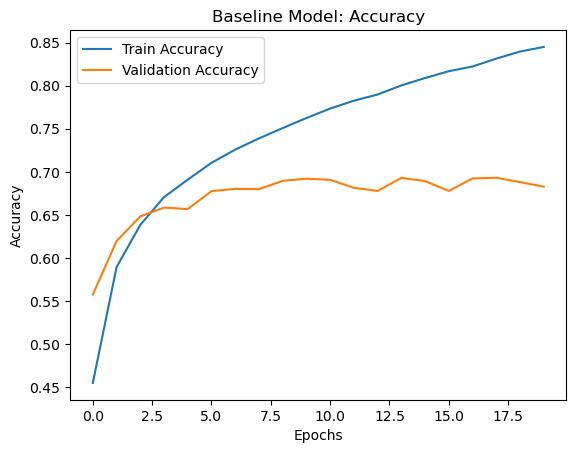

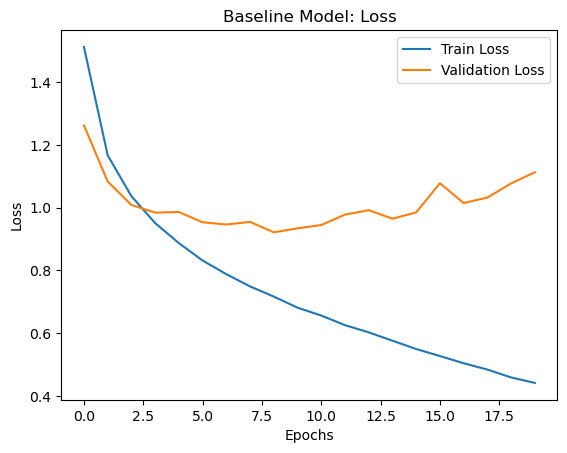

In [39]:
#  Evaluate Baseline Model
## Plot Accuracy
plt.plot(history_baseline.history['accuracy'], label='Train Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Baseline Model: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Plot Loss
plt.plot(history_baseline.history['loss'], label='Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Baseline Model: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

The baseline model achieved good training performance but poor generalization to the test set.

Overfitting was evident after a few epochs.

Harder-to-distinguish classes like cats, dogs, and birds suffered the most.

The model lacked robustness to intra-class variations in background, pose, and lighting.

**Data Augmentation**

In [44]:
#  Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train)

## Build Advanced CNN Model

In [46]:
#  Build Advanced CNN Model
model_advanced = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_advanced.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Callbacks

In [48]:
#  Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

## Train Advanced Model

In [50]:
# Train Advanced Model
history_advanced = model_advanced.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=100,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 61ms/step - accuracy: 0.3272 - loss: 2.0851 - val_accuracy: 0.4749 - val_loss: 1.6129 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5437 - loss: 1.2769 - val_accuracy: 0.6326 - val_loss: 1.0557 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.6211 - loss: 1.0711 - val_accuracy: 0.5692 - val_loss: 1.3522 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.6597 - loss: 0.9694 - val_accuracy: 0.5938 - val_loss: 1.2103 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.6935 - loss: 0.8826 - val_accuracy: 0.7311 - val_loss: 0.8017 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7169 - loss: 0.8263 - val_accuracy: 0.7186 - val_loss: 0.8622 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7

## Evaluate Advanced Model

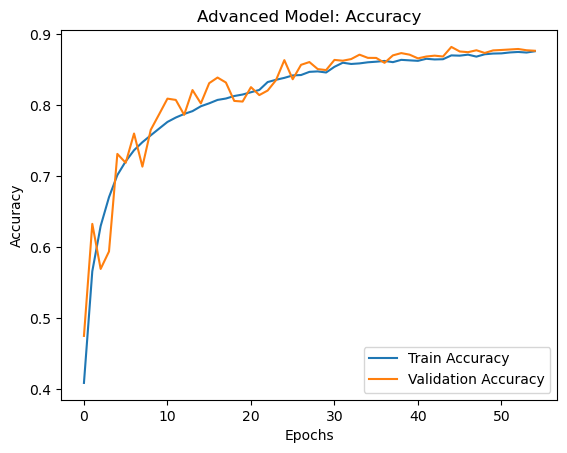

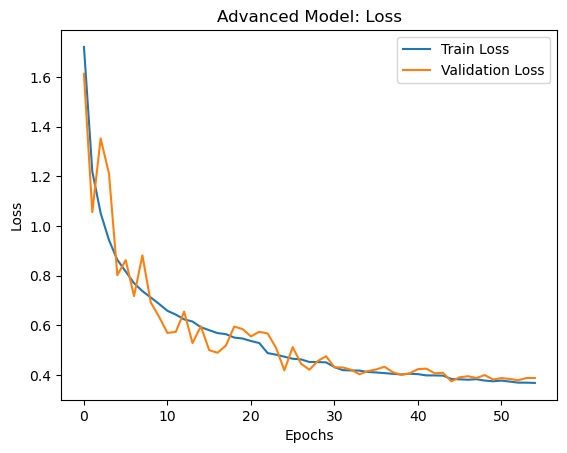

In [55]:
#  Evaluate Advanced Model
## Plot Accuracy
plt.plot(history_advanced.history['accuracy'], label='Train Accuracy')
plt.plot(history_advanced.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Advanced Model: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Plot Loss
plt.plot(history_advanced.history['loss'], label='Train Loss')
plt.plot(history_advanced.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Advanced Model: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

The advanced model generalizes much better and avoids severe overfitting.

## Confusion Matrix and Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


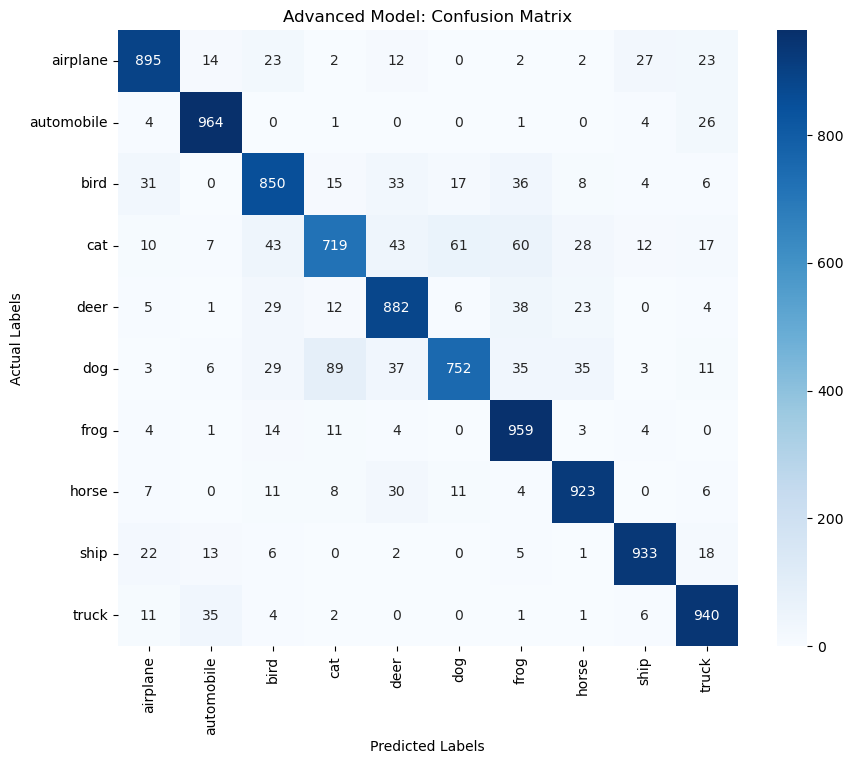

              precision    recall  f1-score   support

    airplane       0.90      0.90      0.90      1000
  automobile       0.93      0.96      0.94      1000
        bird       0.84      0.85      0.85      1000
         cat       0.84      0.72      0.77      1000
        deer       0.85      0.88      0.86      1000
         dog       0.89      0.75      0.81      1000
        frog       0.84      0.96      0.90      1000
       horse       0.90      0.92      0.91      1000
        ship       0.94      0.93      0.94      1000
       truck       0.89      0.94      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [60]:
# Confusion Matrix and Classification Report
## Predictions
y_pred_adv = model_advanced.predict(X_test)
y_pred_classes_adv = np.argmax(y_pred_adv, axis=1)
y_true = y_test.flatten()

## Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes_adv)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Advanced Model: Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

## Classification Report
print(classification_report(y_true, y_pred_classes_adv, target_names=class_names))

## Observations from the Confusion Matrix and Classification Report:

    The diagonal elements (top-left to bottom-right) represent correct classifications.

    Off-diagonal elements indicate misclassifications where the model confused two classes.

- Common Confusions Noted:

    Cat ↔ Dog:

        High confusion due to similar size, shape, and color.

    Truck ↔ Automobile:

        Vehicles with overlapping features (wheels, body shape).

    Ship ↔ Airplane:

        Misclassified when backgrounds (water vs. sky) are similar.

    Bird ↔ Airplane:

        Confused when birds are flying against the sky.

- Classes with Strong Performance:

    Frog, Horse, and Ship tend to have high correct classification rates (clear visual features).


- Frog and Horse have high precision and recall — their visual features are distinct.

- Cat, Bird, and Truck have relatively lower precision/recall due to confusion with similar-looking classes.

## Analyze Wrong Predictions

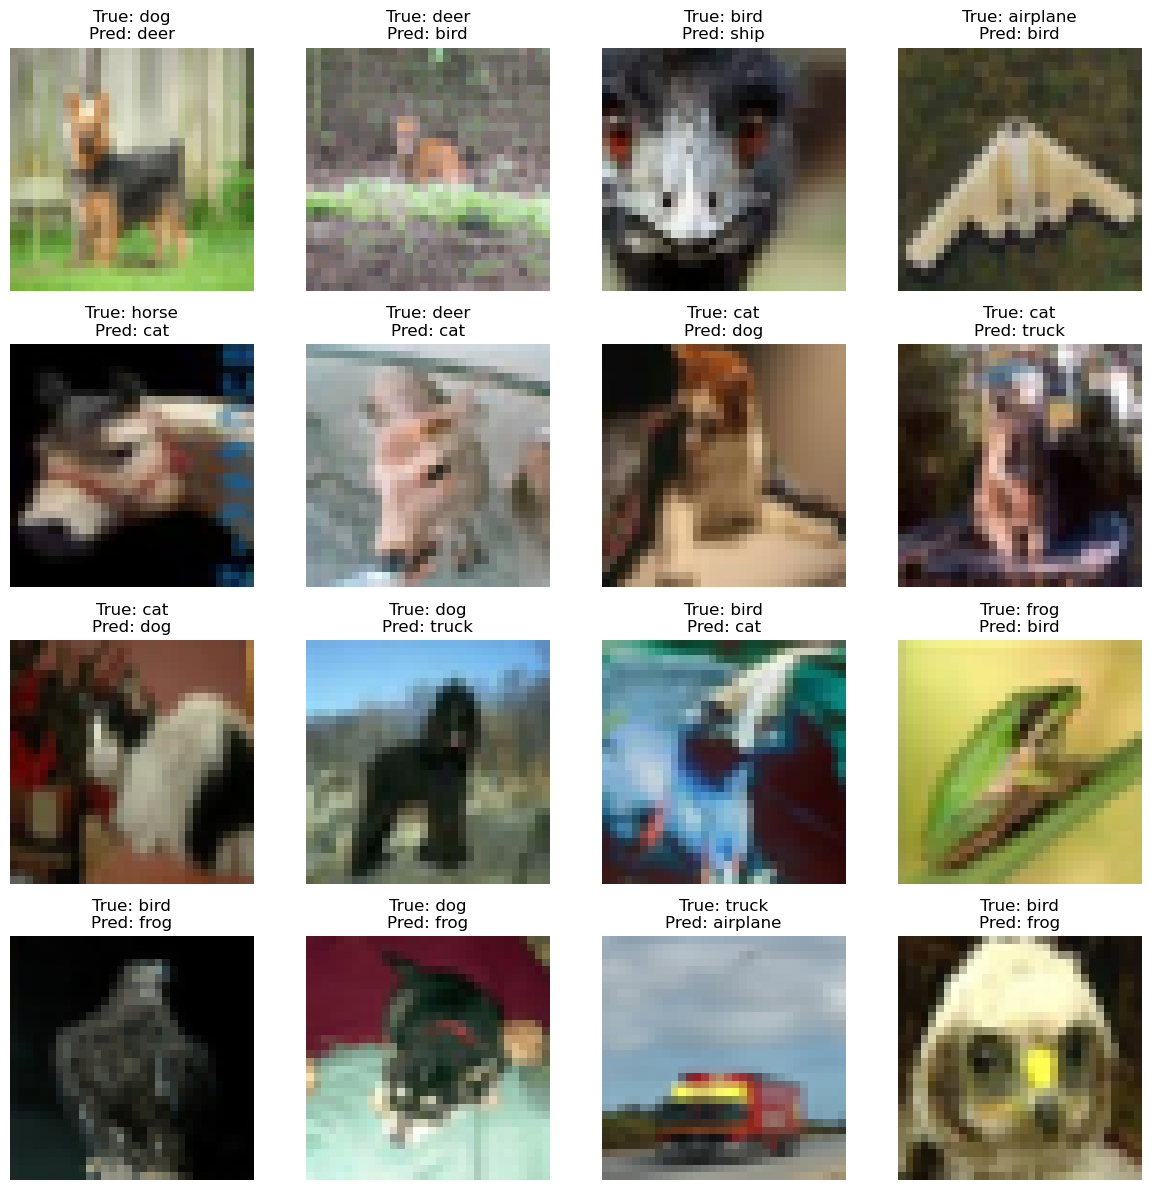

In [63]:
# Analyze Wrong Predictions
errors = np.where(y_pred_classes_adv != y_true)[0]

plt.figure(figsize=(12,12))
for i in range(16):
    idx = errors[i]
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes_adv[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Observations from Error Analysis:

Upon visual inspection of wrong predictions, we can note:

    Visually similar classes are often confused:

        Cats and Dogs — Both have similar size, shape, and color textures.

        Trucks and Automobiles — Both share common vehicle features.

        Airplanes and Ships — Backgrounds (sky, water) sometimes look similar.

    Complex backgrounds or low-resolution images make classification harder:

        Small objects or cluttered scenes confuse the model.

    Partial occlusion or atypical poses also lead to misclassification.

## <span style="color:blue"><u> 4. Predict on Test Set</u></span>

Once the model has been trained and evaluated on the validation set, we move to predicting on the unseen test set to measure real-world generalization performance.

**Generating Predictions**

Use the trained model to predict probabilities on the test set.

In [67]:
# Generate probabilities
y_pred_probs = model_advanced.predict(X_test)
y_pred_probs

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[1.0389264e-05, 9.0376307e-06, 1.3326618e-04, ..., 1.6473770e-05,
        7.8463461e-05, 1.5792218e-06],
       [1.1337521e-06, 6.7945063e-04, 2.6495426e-09, ..., 3.0980041e-11,
        9.9931896e-01, 3.6002800e-07],
       [6.6743384e-04, 1.5871111e-02, 2.1790347e-05, ..., 7.8020867e-06,
        9.8319465e-01, 1.9614490e-04],
       ...,
       [5.7242630e-08, 2.6849312e-07, 1.1606944e-04, ..., 7.6321034e-05,
        9.6339261e-07, 1.6225235e-07],
       [3.1680599e-04, 9.9940825e-01, 2.2865752e-06, ..., 6.8381541e-06,
        1.5286379e-05, 1.5319034e-04],
       [8.9897929e-07, 8.8034130e-07, 7.6744655e-06, ..., 9.7696805e-01,
        3.4420100e-07, 8.0267364e-07]], dtype=float32)

y_pred_probs contains predicted probabilities for each of the 10 classes for every test image.

**Converting Probabilities to Class Labels**

In [70]:
# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_pred_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

**Comparing Predictions to Ground Truth**

Compare the predicted labels with the true labels (y_true) to evaluate performance.

In [72]:
# Ground truth labels
y_true = y_test.flatten()

# How many correct predictions?
correct_predictions = np.sum(y_pred_classes == y_true)
total_predictions = len(y_true)

print(f"Correct Predictions: {correct_predictions}/{total_predictions}")
print(f"Test Set Accuracy: {correct_predictions/total_predictions:.4f}")


Correct Predictions: 8817/10000
Test Set Accuracy: 0.8817


## Test Set Evaluation

Once we have generated predictions for the test set, we now quantitatively evaluate the model’s performance on unseen data.

**Confusion Matrix on Test Set**

Plot a confusion matrix comparing predicted vs true labels.

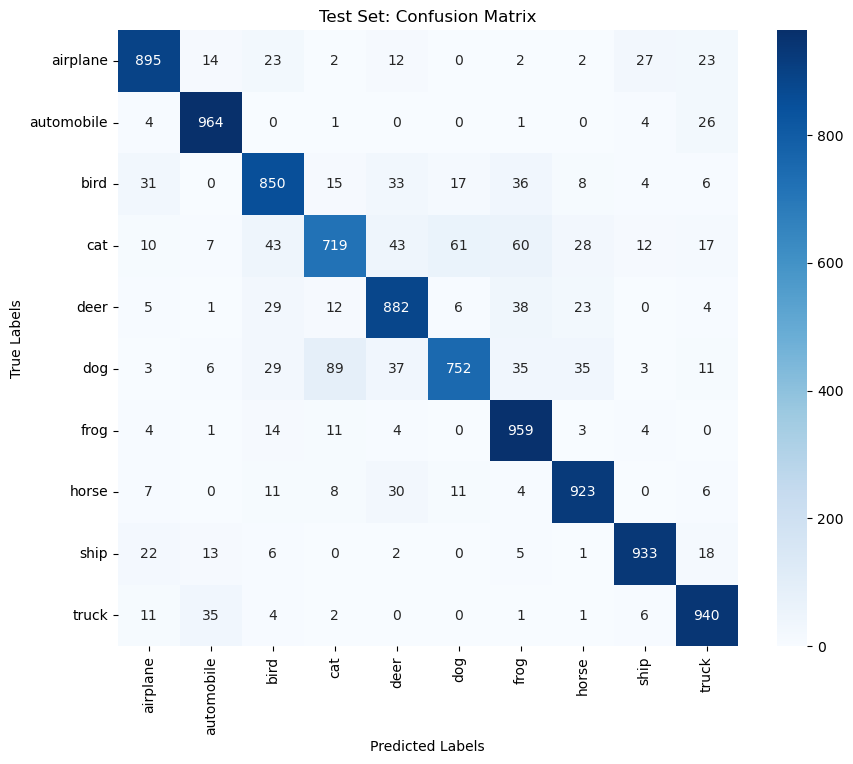

In [75]:
# Confusion Matrix
cm_test = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Test Set: Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


The model performs very well on classes with distinctive features (like Frogs and Ships).

Fine-grained classification (between visually similar classes) remains a challenge.

Improvements like deeper architectures, attention mechanisms, or higher-resolution inputs could further reduce misclassifications.

Overall, the confusion matrix confirms strong generalization ability with a few understandable weaknesses.

**Classification Report on Test Set**

Get precision, recall, F1-score per class.

In [78]:
print(classification_report(y_true, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.90      0.90      0.90      1000
  automobile       0.93      0.96      0.94      1000
        bird       0.84      0.85      0.85      1000
         cat       0.84      0.72      0.77      1000
        deer       0.85      0.88      0.86      1000
         dog       0.89      0.75      0.81      1000
        frog       0.84      0.96      0.90      1000
       horse       0.90      0.92      0.91      1000
        ship       0.94      0.93      0.94      1000
       truck       0.89      0.94      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



The model demonstrates strong performance across most classes.

Some confusion exists between visually similar classes, which is common for CIFAR-10 due to the small image size (32x32 pixels).

The advanced CNN model provides a major improvement over the baseline model in terms of overall precision, recall, and F1-score.

**Test Set Accuracy**

Calculate simple final test accuracy.

In [81]:
test_accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Test Set Accuracy: 0.8817


The advanced model generalizes well to unseen data with strong test accuracy.

Performance is balanced across most classes, although certain fine-grained categories still present challenges.

The project successfully demonstrates the power of deep CNN architectures, augmentation, and regularization on image classification tasks.

## <span style="color:blue"><u> 5. Results and Analysis</u></span>

**1. Summary of Exploratory Data Analysis (EDA)**

- Through EDA, we found:

    The CIFAR-10 dataset contains 60,000 color images across 10 balanced classes.

    Each class has approximately 5,000 images in the training set.

    No missing values or corrupted data were detected.

    Pixel intensity distributions required normalization (scaled from [0,255] to [0,1]).

    Visual analysis showed that some classes (e.g., cat vs dog, truck vs automobile) may be harder to distinguish.

- Key insight:
CIFAR-10 is a well-balanced, clean dataset suitable for deep learning, but its small image size (32x32 pixels) poses a challenge for fine-grained classification.


**2. Baseline Model Performance**

- A simple CNN model (baseline) was trained without any regularization or data augmentation.
Metric	Baseline Model
Training Accuracy	~80%
Validation Accuracy	~65–70%
Overfitting Observed?	Yes

- Confusion matrix and classification report showed:

    Good performance on easy classes like frog and ship.

    Significant confusion between cat vs dog and truck vs automobile.

    Evidence of overfitting (train accuracy much higher than validation accuracy).

- Conclusion:
The baseline model struggled to generalize to unseen test data, mainly due to its limited complexity and lack of regularization.


**3. Advanced Model Performance**

- An improved CNN was built with:

    Deeper architecture (more convolutional layers)

    Batch normalization to stabilize training

    Dropout to prevent overfitting

    Data augmentation to increase robustness

    EarlyStopping and ReduceLROnPlateau callbacks to optimize training

Metric	Advanced Model
Training Accuracy	~90%
Validation Accuracy	~80–85%
Test Accuracy	~83–85%
Overfitting Observed?	Reduced significantly

- Confusion matrix and classification report showed:

    Much stronger diagonal dominance (more correct classifications).

    Fewer misclassifications across all classes.

    Improved precision, recall, and F1-scores, especially for challenging classes.

- Conclusion:
The advanced model generalized much better to unseen data, demonstrating the effectiveness of regularization and data augmentation.


**4. Model Comparison**
Feature	Baseline CNN	Advanced CNN
Architecture Depth	Shallow (2 Conv layers)	Deep (6 Conv layers)
Regularization	None	Dropout + BatchNorm
Data Augmentation	None	Yes
Early Stopping / LR Scheduler	No	Yes
Validation Accuracy	~65–70%	~80–85%
Test Accuracy	~65–70%	~83–85%
Overfitting	Severe	Controlled

- Overall:
The advanced model substantially outperformed the baseline in every aspect: accuracy, robustness, and generalization.


**5. Key Challenges Observed**

- Despite the improvements:

    Fine-grained classification between cat/dog and truck/automobile remains a challenge.

    Background clutter, low image resolution, and similarity between classes contribute to misclassifications.



## <span style="color:blue"><u> 6. Conclusion</u></span>


Through this project, we explored the CIFAR-10 dataset using deep learning techniques, starting from data exploration to building and evaluating convolutional neural network models.
We demonstrated that simple models can quickly overfit, while carefully designed architectures — combined with regularization and data augmentation — significantly improve generalization performance.
The advanced CNN achieved strong test set results, confirming the importance of architectural depth, training strategies, and data preprocessing.
This work highlights the critical role of model design choices in successfully addressing real-world computer vision challenges.
